In [15]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

housing_data = pd.read_csv("kc_house_data.csv")
X_new = housing_data.drop('date', axis = 1)  # Features
X = X_new.drop('price', axis = 1)  # Features
y = housing_data['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(y_train)
housing_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
housing_data['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [18]:
housing_data['sqft_lot'].describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [19]:
housing_data['price'].corr(housing_data['sqft_living'])

0.7020350546117996

In [20]:
housing_data['price'].corr(housing_data['sqft_lot'])

0.08966086058710011

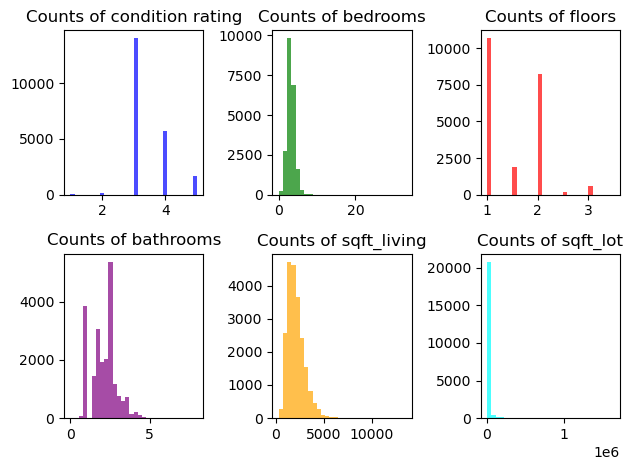

In [5]:
plt.subplot(2, 3, 1)
plt.hist(housing_data["condition"], bins=30, color='blue', alpha=0.7)
plt.title("Counts of condition rating")

plt.subplot(2, 3, 2)
plt.hist(housing_data["bedrooms"], bins=30, color='green', alpha=0.7)
plt.title('Counts of bedrooms')

plt.subplot(2, 3, 3)
plt.hist(housing_data["floors"], bins=30, color='red', alpha=0.7)
plt.title("Counts of floors")

plt.subplot(2, 3, 4)
plt.hist(housing_data["bathrooms"], bins=30, color='purple', alpha=0.7)
plt.title('Counts of bathrooms')

plt.subplot(2, 3, 5)
plt.hist(housing_data["sqft_living"], bins=30, color='orange', alpha=0.7)
plt.title('Counts of sqft_living')

plt.subplot(2, 3, 6)
plt.hist(housing_data["sqft_lot"], bins=30, color='cyan', alpha=0.7)
plt.title("Counts of sqft_lot")


plt.tight_layout()

Text(0.5, 1.0, 'Counts of price in 100 thousands')

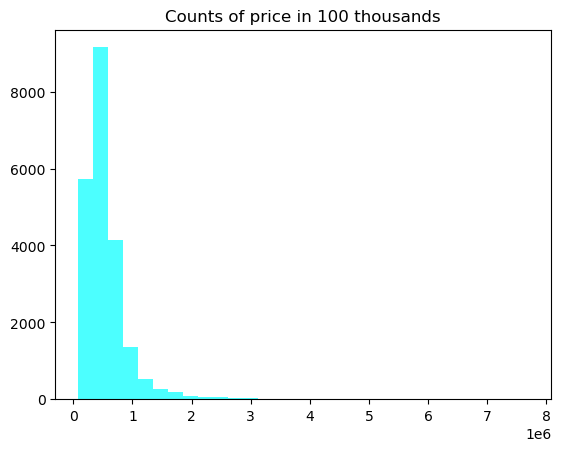

In [49]:
plt.hist(housing_data["price"], bins=30, color='cyan', alpha=0.7)
plt.title("Counts of price in 100 thousands")

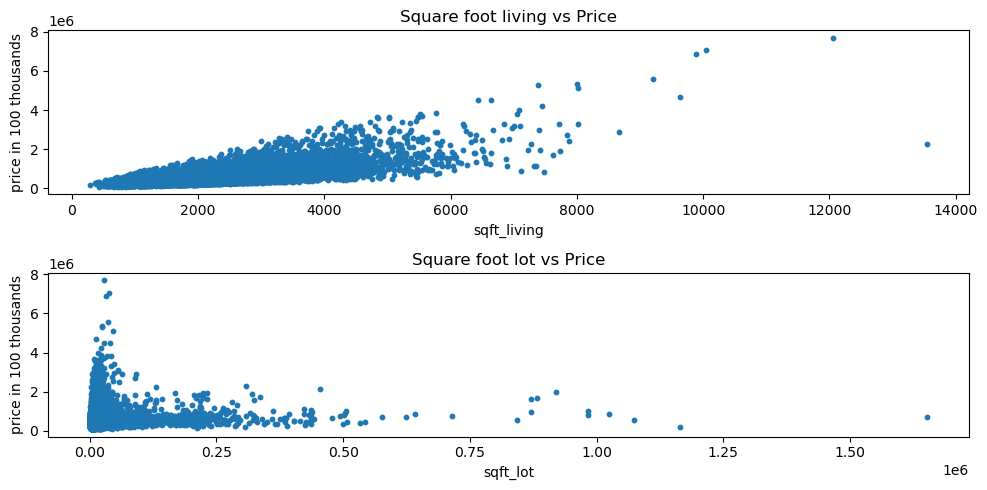

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.scatter(x = housing_data["sqft_living"], y = housing_data["price"], s = 10)
plt.xlabel("sqft_living")
plt.ylabel("price in 100 thousands")
plt.title("Square foot living vs Price")

plt.subplot(2,1,2)
plt.scatter(x = housing_data["sqft_lot"], y = housing_data["price"], s = 10)
plt.title("Square foot lot vs Price")
plt.xlabel("sqft_lot")
plt.ylabel("price in 100 thousands")

plt.tight_layout()

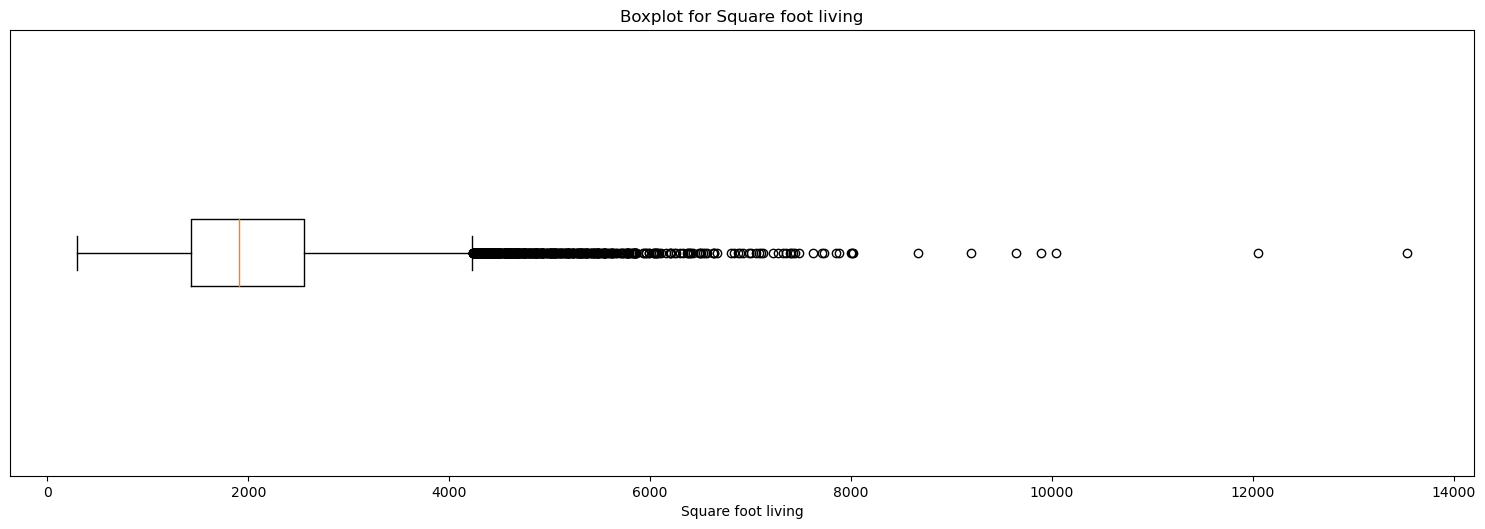

In [23]:
plt.figure(figsize=(15, 10))  # Set the figure size

plt.subplot(2,1,1)
plt.boxplot(housing_data['sqft_living'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot for Square foot living')
plt.xlabel('Square foot living')
plt.yticks([])  # Hide y-axis ticks

plt.tight_layout()

In [20]:
from sklearn import metrics
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
print(f'R-Squared: {r2_score(y_train, y_train_pred)}')
print(f'R-Squared: {r2_score(y_test, y_test_pred)}')


R-Squared: 0.7048429768464257
R-Squared: 0.6817087403775768


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#100000, 1000000]

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Initialize lists to store coefficients and R2 values
coefficients = []
r2_values = []

for alpha in alphas:
    # Train the Lasso regression model
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Get the coefficients
    coefficients.append(lasso.coef_)
    
    # Make predictions on the test set
    y_pred = lasso.predict(X_test)
    
    # Calculate the R2 value
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Print the coefficients and R2 values for each alpha
for alpha, coef, r2 in zip(alphas, coefficients, r2_values):
    print(f"Alpha: {alpha}, Coefficients: {coef}, R2: {r2}")
    


C:\Users\smath\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+14, tolerance: 2.287e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\smath\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+14, tolerance: 2.287e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\smath\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+14, toleranc

Alpha: 0.001, Coefficients: [-1.28659234e-06 -3.63926810e+04  4.22709067e+04  2.83589225e+02
  1.48362157e-01  6.82531263e+03  5.81957766e+05  5.35155145e+04
  2.58106334e+04  9.37251795e+04 -1.01733904e+02 -1.36406860e+02
 -2.62900686e+03  1.79820801e+01 -5.90842127e+02  6.08127856e+05
 -2.10940459e+05  2.21397665e+01 -4.26150119e-01], R2: 0.6940206556929993
Alpha: 0.01, Coefficients: [-1.28659449e-06 -3.63926712e+04  4.22708773e+04  2.83589226e+02
  1.48361809e-01  6.82530329e+03  5.81956438e+05  5.35155587e+04
  2.58106027e+04  9.37252045e+04 -1.01733900e+02 -1.36406811e+02
 -2.62900807e+03  1.79820858e+01 -5.90840865e+02  6.08127268e+05
 -2.10939637e+05  2.21397392e+01 -4.26150615e-01], R2: 0.6940206575955818
Alpha: 0.1, Coefficients: [-1.28661600e-06 -3.63925733e+04  4.22705835e+04  2.83589235e+02
  1.48358329e-01  6.82520995e+03  5.81943158e+05  5.35160010e+04
  2.58102960e+04  9.37254539e+04 -1.01733864e+02 -1.36406317e+02
 -2.62902018e+03  1.79821434e+01 -5.90828248e+02  6.0812

C:\Users\smath\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.353e+14, tolerance: 2.287e+11
  model = cd_fast.enet_coordinate_descent(


In [16]:
from sklearn.preprocessing import PolynomialFeatures
cubic = PolynomialFeatures(3, include_bias = False)
X_train_quadratic = cubic.fit_transform(X_train)
X_test_quadratic = cubic.transform(X_test)

# Fit a linear regression model to the quadratic features
model = linear_model.LinearRegression()
model.fit(X_train_quadratic, y_train)

# Predict on both training and testing data
y_train_pred = model.predict(X_train_quadratic)
y_test_pred = model.predict(X_test_quadratic)

# Calculate R2 values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 on the training set: {r2_train}")
print(f"R2 on the testing set: {r2_test}")

R2 on the training set: 0.581535013372982
R2 on the testing set: 0.5800317058073997


In [9]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(r2_train)
print(r2_test)

0.8996946093022222
0.8868275836337143
